import all the necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import mean_absolute_error as mae, mean_squared_error as mse , r2_score


In [3]:
# get the data
df= pd.read_csv("insurance.csv")
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


# EDA

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [6]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


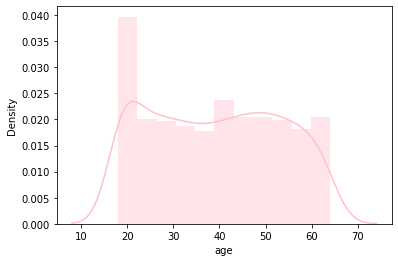

In [7]:
sns.distplot(df["age"],kde=True,color="pink")
plt.show()

distplot shows that maximum number of people are near the age of 20.

In [8]:
df["age"].value_counts()

18    69
19    68
50    29
51    29
47    29
46    29
45    29
20    29
48    29
52    29
22    28
49    28
54    28
53    28
21    28
26    28
24    28
25    28
28    28
27    28
23    28
43    27
29    27
30    27
41    27
42    27
44    27
31    27
40    27
32    26
33    26
56    26
34    26
55    26
57    26
37    25
59    25
58    25
36    25
38    25
35    25
39    25
61    23
60    23
63    23
62    23
64    22
Name: age, dtype: int64

We cannot simply use the age column for visualization instead of that divide the age between the gruops make it easier for better visualisation.

In [9]:
def age_new(age):
    if age > 60 :
         return ('60+')
    elif age > 50:
        return ('60-50')
    elif age > 40:
        return ('50-40')
    elif age > 30:
        return ('40-30')
    elif age >=18 :
        return ('18-30')
    
    else : 
        return None
    

In [10]:
df["age_gr"]= df["age"].apply(age_new)

In [11]:
df["age_gr"].value_counts()

18-30    444
50-40    281
60-50    265
40-30    257
60+       91
Name: age_gr, dtype: int64

sns.countplot(data= df,x= "age_gr",hue= "sex",palette= "Blues")

The countplot of age with sex shows the data have same counts of male and female

same like age, charges do have many values make us difficult to visualize on plot properly so divide the charges to gruop and made the function with python.

In [12]:
def charges_new(charges):
    if charges>40000:
        return("more than 40000")
    elif charges >20000:
        return("40000-20000")
    elif charges >10000:
        return ("20000-10000")
    elif charges >5000:
        return ("10000-5000")
    elif charges >2000:
        return ("5000-2000")
    elif charges< 2000 :
        return("below 2000")
    else:
        return None

In [13]:
df["charges_new"]= df["charges"].apply(charges_new)

In [14]:
df["charges_new"].value_counts()

20000-10000        353
10000-5000         353
5000-2000          267
40000-20000        194
below 2000          92
more than 40000     79
Name: charges_new, dtype: int64

<AxesSubplot:xlabel='smoker', ylabel='count'>

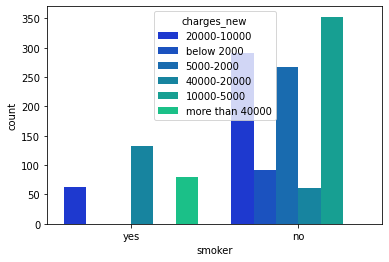

In [15]:
sns.countplot(data= df,x= "smoker",hue= "charges_new",palette="winter")

from countplot we can guess that smoker will have to pay more charges as compare to non smoker

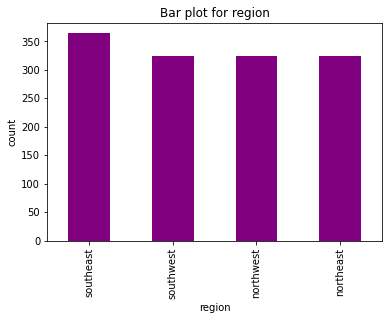

In [16]:
df["region"].value_counts().plot(kind="bar",color="purple")
plt.title("Bar plot for region")
plt.xlabel("region")
plt.ylabel("count")
plt.show()

The data have equal values for all the region.

<AxesSubplot:xlabel='region', ylabel='count'>

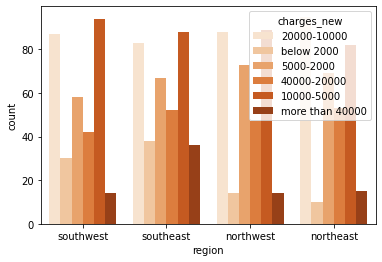

In [17]:
sns.countplot(data= df,x= "region",hue= "charges_new",palette="Oranges")

[]

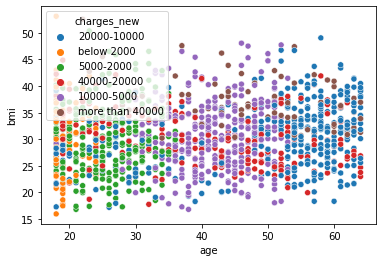

In [18]:
sns.scatterplot(data= df,x= "age",y= "bmi",hue="charges_new")
plt.plot()

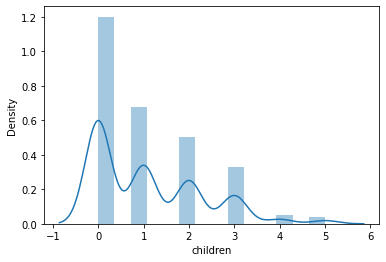

In [19]:
sns.distplot(df["children"])
plt.show()

In [20]:
df.children.value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

number of people are more with no child

<AxesSubplot:xlabel='children', ylabel='count'>

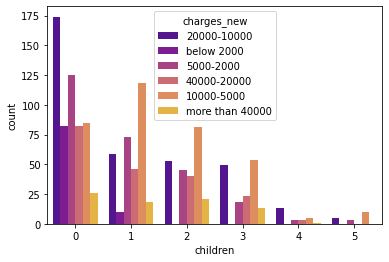

In [21]:
sns.countplot(data= df,x= "children",hue= "charges_new",palette="plasma")

# Handling the Outliers

<AxesSubplot:xlabel='age_gr', ylabel='bmi'>

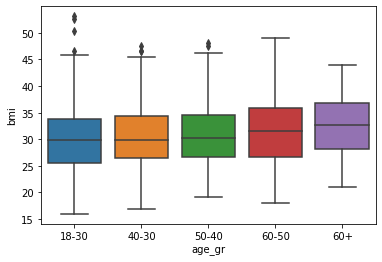

In [22]:
sns.boxplot(data= df, x="age_gr",y= "bmi")

In [23]:
df[(df["age"]==50) & (df["bmi"]>45)]

,age,sex,bmi,children,smoker,region,charges,age_gr,charges_new
941,50,female,46.09,1,no,southeast,9549.5651,50-40,10000-5000


In [24]:
df.drop([1317,1047,847,454,660,860,582,292,930,1131,549,286,401,1024,941],inplace= True)

<AxesSubplot:xlabel='age_gr', ylabel='bmi'>

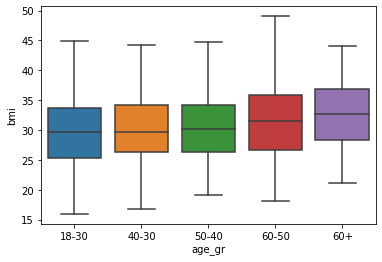

In [25]:
sns.boxplot(data= df, x="age_gr",y= "bmi")

In [26]:
df.head()

,age,sex,bmi,children,smoker,region,charges,age_gr,charges_new
0,19,female,27.900,0,yes,southwest,16884.92400,18-30,20000-10000
1,18,male,33.770,1,no,southeast,1725.55230,18-30,below 2000
2,28,male,33.000,3,no,southeast,4449.46200,18-30,5000-2000
3,33,male,22.705,0,no,northwest,21984.47061,40-30,40000-20000
4,32,male,28.880,0,no,northwest,3866.85520,40-30,5000-2000


In [27]:
df.drop(["age_gr","charges_new"],axis=1 ,inplace =True)

In [28]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


# Divide the categorical and numeric columns from dataframe

In [29]:
df_num = df.select_dtypes(["int64", "float64"])
df_cat = df.select_dtypes(object)

In [30]:
df_num

,age,bmi,children,charges
0,19,27.900,0,16884.92400
1,18,33.770,1,1725.55230
2,28,33.000,3,4449.46200
3,33,22.705,0,21984.47061
4,32,28.880,0,3866.85520
...,...,...,...,...
1333,50,30.970,3,10600.54830
1334,18,31.920,0,2205.98080
1335,18,36.850,0,1629.83350
1336,21,25.800,0,2007.94500


In [31]:
df_cat

,sex,smoker,region
0,female,yes,southwest
1,male,no,southeast
2,male,no,southeast
3,male,no,northwest
4,male,no,northwest
...,...,...,...
1333,male,no,northwest
1334,female,no,northeast
1335,female,no,southeast
1336,female,no,southwest


# Encoding for Cateogorical columns with labelEncoder

In [32]:
from sklearn.preprocessing import LabelEncoder

In [33]:
for col in df_cat:
    le = LabelEncoder()
    df_cat[col] = le.fit_transform(df[col])

# Merge the catogorical and numeric columns

In [34]:
df = pd.concat([df_cat,df_num], axis=1)

In [35]:
df.head()

,sex,smoker,region,age,bmi,children,charges
0,0,1,3,19,27.900,0,16884.92400
1,1,0,2,18,33.770,1,1725.55230
2,1,0,2,28,33.000,3,4449.46200
3,1,0,1,33,22.705,0,21984.47061
4,1,0,1,32,28.880,0,3866.85520


# Separate X and Y

In [36]:
x= df.iloc[:,:-1]
y= df.iloc[:,-1]

# Scaling with StandardScaler

In [37]:
from sklearn.preprocessing import StandardScaler

In [38]:
for col in x:
    sc = StandardScaler()
    x[col]= sc.fit_transform(x[[col]])

# Split the data into Train and Test

In [39]:

xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.25,random_state=0)

# Model Building

In [40]:
def mymodel(model):
    model.fit(xtrain,ytrain)
    ypred = model.predict(xtest)
    
    print(f"MAE - : {mae(ytest,ypred)}\nMSE- : {mse(ytest,ypred)}\nRMSE- : {np.sqrt(mse(ytest,ypred))}\nAccuracy -: {r2_score(ytest,ypred)}\n\n")

# Evaluation from models

In [41]:
models = []
models.append(("LinReg             :- ",LinearRegression()))

models.append(("DT                 :- ",DecisionTreeRegressor()))

models.append(("RF                 :- ",RandomForestRegressor()))


for name,model in models:
    print(name)
    mymodel(model)

LinReg             :- 
MAE - : 4607.444982908057
MSE- : 44179300.65796681
RMSE- : 6646.751135552377
Accuracy -: 0.7086530331533469


DT                 :- 
MAE - : 3329.0251715709974
MSE- : 47180552.39329213
RMSE- : 6868.810114808251
Accuracy -: 0.688860832353251


RF                 :- 
MAE - : 2711.855861432145
MSE- : 26319655.042057198
RMSE- : 5130.268515590309
Accuracy -: 0.8264311215716178




# Hyperparameter Tunning for DecisionTree

In [42]:
from sklearn.model_selection import GridSearchCV

In [43]:
para = {"max_depth":[5,10,15],"min_samples_leaf":[5,10,15,20]}

In [44]:
dt = DecisionTreeRegressor()

In [45]:
grid= GridSearchCV(dt,para,refit=True,verbose=3)
grid.fit(xtrain,ytrain)
ypred= grid.predict(xtest)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV 1/5] END ...max_depth=5, min_samples_leaf=5;, score=0.852 total time=   0.0s
[CV 2/5] END ...max_depth=5, min_samples_leaf=5;, score=0.811 total time=   0.0s
[CV 3/5] END ...max_depth=5, min_samples_leaf=5;, score=0.832 total time=   0.0s
[CV 4/5] END ...max_depth=5, min_samples_leaf=5;, score=0.879 total time=   0.0s
[CV 5/5] END ...max_depth=5, min_samples_leaf=5;, score=0.882 total time=   0.0s
[CV 1/5] END ..max_depth=5, min_samples_leaf=10;, score=0.853 total time=   0.0s
[CV 2/5] END ..max_depth=5, min_samples_leaf=10;, score=0.811 total time=   0.0s
[CV 3/5] END ..max_depth=5, min_samples_leaf=10;, score=0.838 total time=   0.0s
[CV 4/5] END ..max_depth=5, min_samples_leaf=10;, score=0.882 total time=   0.0s
[CV 5/5] END ..max_depth=5, min_samples_leaf=10;, score=0.887 total time=   0.0s
[CV 1/5] END ..max_depth=5, min_samples_leaf=15;, score=0.851 total time=   0.0s
[CV 2/5] END ..max_depth=5, min_samples_leaf=15;

In [46]:
grid.best_params_

{'max_depth': 5, 'min_samples_leaf': 15}

In [47]:
dt= DecisionTreeRegressor(max_depth= 5, min_samples_leaf= 15)
dt.fit(xtrain,ytrain)
ypred = dt.predict(xtest)

In [48]:
print(r2_score(ytest,ypred))

0.8386316843542045


# Hyperparameter Tunning for RandomForest

In [49]:
rf = RandomForestRegressor()

In [50]:
parar = {"max_depth":[5,10,15],"min_samples_leaf":[5,10,15,20],"max_samples":[50,100]}

In [51]:
gridr= GridSearchCV(rf,parar,refit=True,verbose=3)
gridr.fit(xtrain,ytrain)
ypred= gridr.predict(xtest)

Fitting 5 folds for each of 24 candidates, totalling 120 fits
[CV 1/5] END max_depth=5, max_samples=50, min_samples_leaf=5;, score=0.793 total time=   0.1s
[CV 2/5] END max_depth=5, max_samples=50, min_samples_leaf=5;, score=0.745 total time=   0.1s
[CV 3/5] END max_depth=5, max_samples=50, min_samples_leaf=5;, score=0.787 total time=   0.1s
[CV 4/5] END max_depth=5, max_samples=50, min_samples_leaf=5;, score=0.766 total time=   0.1s
[CV 5/5] END max_depth=5, max_samples=50, min_samples_leaf=5;, score=0.823 total time=   0.1s
[CV 1/5] END max_depth=5, max_samples=50, min_samples_leaf=10;, score=0.606 total time=   0.1s
[CV 2/5] END max_depth=5, max_samples=50, min_samples_leaf=10;, score=0.557 total time=   0.1s
[CV 3/5] END max_depth=5, max_samples=50, min_samples_leaf=10;, score=0.557 total time=   0.1s
[CV 4/5] END max_depth=5, max_samples=50, min_samples_leaf=10;, score=0.540 total time=   0.1s
[CV 5/5] END max_depth=5, max_samples=50, min_samples_leaf=10;, score=0.538 total time= 

[CV 2/5] END max_depth=15, max_samples=50, min_samples_leaf=10;, score=0.508 total time=   0.1s
[CV 3/5] END max_depth=15, max_samples=50, min_samples_leaf=10;, score=0.529 total time=   0.0s
[CV 4/5] END max_depth=15, max_samples=50, min_samples_leaf=10;, score=0.513 total time=   0.1s
[CV 5/5] END max_depth=15, max_samples=50, min_samples_leaf=10;, score=0.513 total time=   0.1s
[CV 1/5] END max_depth=15, max_samples=50, min_samples_leaf=15;, score=0.138 total time=   0.1s
[CV 2/5] END max_depth=15, max_samples=50, min_samples_leaf=15;, score=0.190 total time=   0.1s
[CV 3/5] END max_depth=15, max_samples=50, min_samples_leaf=15;, score=0.138 total time=   0.0s
[CV 4/5] END max_depth=15, max_samples=50, min_samples_leaf=15;, score=0.152 total time=   0.1s
[CV 5/5] END max_depth=15, max_samples=50, min_samples_leaf=15;, score=0.161 total time=   0.1s
[CV 1/5] END max_depth=15, max_samples=50, min_samples_leaf=20;, score=0.082 total time=   0.1s
[CV 2/5] END max_depth=15, max_samples=5

In [52]:
gridr.best_params_

{'max_depth': 5, 'max_samples': 100, 'min_samples_leaf': 5}

In [53]:
rf = RandomForestRegressor(max_depth=5, max_samples=100,min_samples_leaf=5,random_state=1)

In [54]:
rf.fit(xtrain,ytrain)
ypred = rf.predict(xtest)

In [55]:
print(r2_score(ytest,ypred))

0.8316674966288229


# Conclusion

Accuracy :
- linreg : 70.86 %
- dt     : 70.02 %
- rf     : 82.69 %

Accuracy After Hyperparameter Tunning:

- dt     : 83.86 %
- rf     : 83.16 %